# Loan Approval Prediction

## Import Modules

In [1]:
#Importing Required Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

print("Modules Imported Successfully!")

Modules Imported Successfully!


In [2]:
#Importing Modules As Required
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 

print("Success!")

Success!


In [3]:
#Loading Dataset
df = pd.read_csv('Loan_Train.csv')

print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


In [4]:
#Checking the Shape of Dataset
df.shape

(614, 13)

- There are **614 Rows** and **13 Columns** in our dataset.

In [5]:
#Checking Column Names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
#First 5 rows of data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
#Datatypes of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
#Statistical information about data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
#Checking unique values in each feature
df.apply(lambda x: len(x.unique()))

Loan_ID              614
Gender                 3
Married                3
Dependents             5
Education              2
Self_Employed          3
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [10]:
#Datatypes of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
#Checking null values in data, if any
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#Handling Null Values with different strae
df['Gender'] = df['Gender'].fillna('Male')
df['Married'] = df['Married'].fillna('Yes')
df['Dependents'] = df['Dependents'].fillna(0)
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Self_Employed'] = df['Self_Employed'].fillna('No')
df['Credit_History'] = df['Credit_History'].fillna(0)

In [13]:
#Rechecking for null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
#Loan_ID as index and then dropping it
df.index = df['Loan_ID']
df = df.drop(columns='Loan_ID', axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [15]:
#Checking for Duplicate Rows
df.duplicated().sum()

0

In [16]:
#Checking data before moving to EDA
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


## Exploratory Data Analysis

#### Loan Status

[Text(0, 0, '422'), Text(0, 0, '192')]

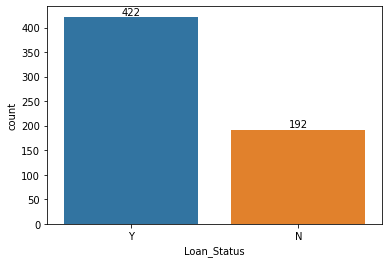

In [17]:
#Countplot for Loan Status
ax = sns.countplot(x='Loan_Status', data=df)
ax.bar_label(ax.containers[0])

- Nearly **68%** loans gets approved.

#### Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

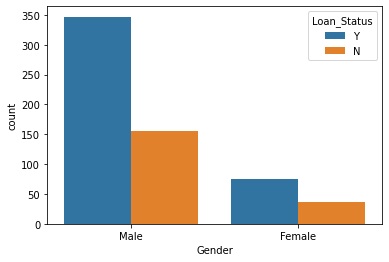

In [18]:
#Countplot for loans on the basis of gender
sns.countplot(x=df['Gender'], data=df, hue='Loan_Status')

- **There are more Men than Women. (Approx. 3x)**

#### Married

<AxesSubplot:xlabel='Married', ylabel='count'>

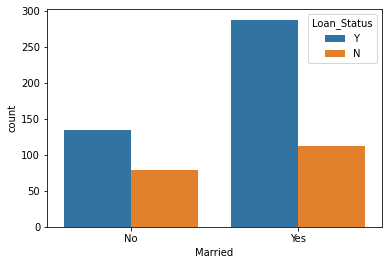

In [19]:
#Countplot for loans on the basis of marital status
sns.countplot(x=df['Married'], data=df, hue='Loan_Status')

- **2/3rd of the population in the dataset is Married and Married applicants are more likely to be granted loans.**

#### Dependents

<AxesSubplot:xlabel='Dependents', ylabel='count'>

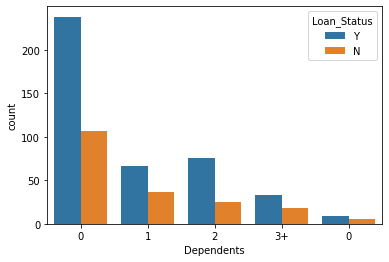

In [20]:
#Countplot for loans on the basis of Dependents
sns.countplot(x=df['Dependents'], data=df, hue='Loan_Status')

- **Majority of the population have 0 dependents and are also likely to accepted for loan.**

#### Education

<AxesSubplot:xlabel='Education', ylabel='count'>

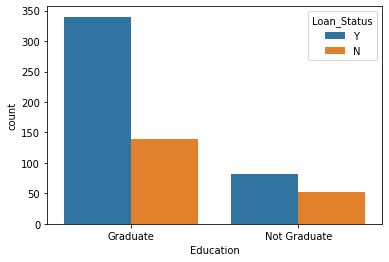

In [21]:
#Countplot for loans on the basis of Education
sns.countplot(x=df['Education'], data=df, hue='Loan_Status')

- **Nearly 5/6th population is graduate and are more likey to be approved for loan**

#### Self Employed

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

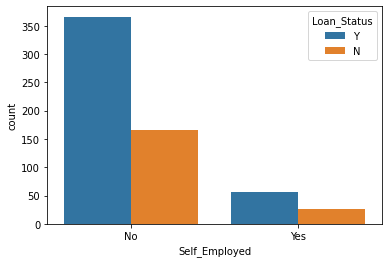

In [22]:
#Countplot for loans on the basis of Employment
sns.countplot(x=df['Self_Employed'], data=df, hue='Loan_Status')

- **5/6th of the population is not self-employed.**

#### Loan Amount Term

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

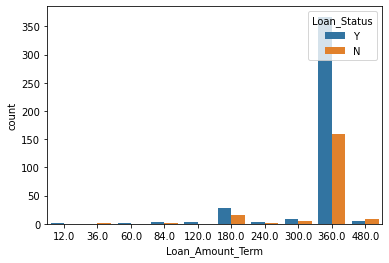

In [23]:
#Countplot for loans on the basis of Term
sns.countplot(x=df['Loan_Amount_Term'], data=df, hue='Loan_Status')

- **Majority of the loans are taken for 360 Months.(30 Years)**

#### Credit History

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

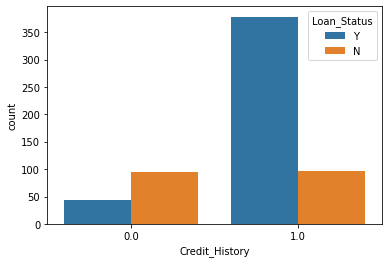

In [24]:
#Countplot for the loans on the basis of Credit History
sns.countplot(x=df['Credit_History'], data=df, hue='Loan_Status')

- **Applicants with credit history are more likely to be approved.**

#### Property Area

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

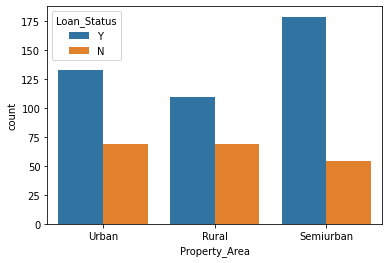

In [25]:
#Countplot for loans on the basis of Area
sns.countplot(x=df['Property_Area'], data=df, hue='Loan_Status')

- **More applicants from Semi-urban and also more likely to be granted loans**

#### Applicant Income

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

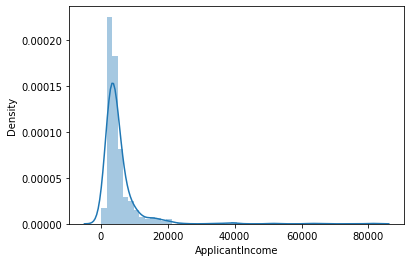

In [26]:
#Histogram for Applicant Income
sns.distplot(df['ApplicantIncome'])

#### Coapplicant Income

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

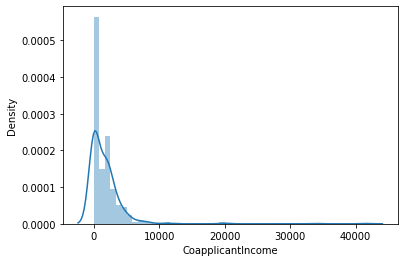

In [27]:
#Histogram for Coapplicant Income
sns.distplot(df['CoapplicantIncome'])

#### Loan Amount

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

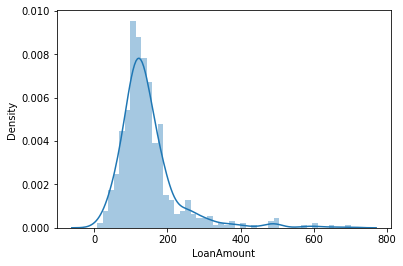

In [28]:
#Histogram for Loan Amount
sns.distplot(df['LoanAmount'])

- **Other than the skewedness of numerical data, there is nothing much to correlate the data in numerical features.**

## Preprocessing

In [29]:
#Encoding categorical values to numerical
df = pd.get_dummies(df, drop_first=True)

In [30]:
#Splitting the data into Feature and Target Variable
X = df.drop(columns = 'Loan_Status_Y')
y = df['Loan_Status_Y']

In [31]:
#Splitting the data in Training and Test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

## Training the models

#### Logistic Regression

In [32]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_pred = LR.predict(X_test)

In [34]:
acc_LR = accuracy_score(y_test,y_pred)
f1_LR = f1_score(y_test,y_pred)

print("Accuracy: ", acc_LR)
print("F1 Score: ", f1_LR)

Accuracy:  0.8048780487804879
F1 Score:  0.8666666666666667


#### Gaussian Naive Bayes

In [35]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)

GaussianNB()

In [36]:
y_pred = GNB.predict(X_test)

In [37]:
acc_GNB = accuracy_score(y_test,y_pred)
f1_GNB = f1_score(y_test,y_pred)

print("Accuracy: ", acc_GNB)
print("F1 Score: ", f1_GNB)

Accuracy:  0.7642276422764228
F1 Score:  0.8432432432432432


#### Decision Tree

In [38]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [39]:
y_pred = DT.predict(X_test)

In [40]:
acc_DT = accuracy_score(y_test,y_pred)
f1_DT = f1_score(y_test,y_pred)

print("Accuracy: ", acc_DT)
print("F1 Score: ", f1_DT)

Accuracy:  0.6829268292682927
F1 Score:  0.7636363636363637


#### Random Forest

In [41]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
y_pred = RF.predict(X_test)

In [43]:
acc_RF = accuracy_score(y_test,y_pred)
f1_RF = f1_score(y_test,y_pred)

print("Accuracy: ", acc_RF)
print("F1 Score: ", f1_RF)

Accuracy:  0.7804878048780488
F1 Score:  0.8439306358381502


#### Support Vecotr Machine

In [44]:
SVM = SVC()
SVM.fit(X_train,y_train)

SVC()

In [45]:
y_pred = SVM.predict(X_test)

In [46]:
acc_SVM = accuracy_score(y_test,y_pred)
f1_SVM = f1_score(y_test,y_pred)

print("Accuracy: ", acc_SVM)
print("F1 Score: ", f1_SVM)

Accuracy:  0.6910569105691057
F1 Score:  0.8173076923076924


#### K-Nearest Neighbors

In [47]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [48]:
y_pred = KNN.predict(X_test)

In [49]:
acc_KNN = accuracy_score(y_test,y_pred)
f1_KNN = f1_score(y_test,y_pred)

print("Accuracy: ", acc_KNN)
print("F1 Score: ", f1_KNN)

Accuracy:  0.6504065040650406
F1 Score:  0.7624309392265194


#### XGBoost

In [50]:
XGB = XGBClassifier(eval_metric='mlogloss')
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [51]:
y_pred = XGB.predict(X_test)

In [52]:
acc_XGB = accuracy_score(y_test,y_pred)
f1_XGB = f1_score(y_test,y_pred)

print("Accuracy: ", acc_XGB)
print("F1 Score: ", f1_XGB)

Accuracy:  0.7317073170731707
F1 Score:  0.8070175438596492


#### Light GBM

In [53]:
LGBM = LGBMClassifier()
LGBM.fit(X_train, y_train)

LGBMClassifier()

In [54]:
y_pred = LGBM.predict(X_test)

In [55]:
acc_LGBM = accuracy_score(y_test,y_pred)
f1_LGBM = f1_score(y_test,y_pred)

print("Accuracy: ", acc_LGBM)
print("F1 Score: ", f1_LGBM)

Accuracy:  0.7479674796747967
F1 Score:  0.8208092485549133


## Evaluation

#### Accuracy Scores

In [56]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors', 'XGBoost Classifier', 'Light Gradient Boosting Machine'],
    'Score': [acc_LR, acc_GNB, acc_DT, acc_RF, acc_SVM, acc_KNN, acc_XGB, acc_LGBM]})

models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,0.804878
3,Random Forest,0.780488
1,Naive Bayes,0.764228
7,Light Gradient Boosting Machine,0.747967
6,XGBoost Classifier,0.731707
4,Support Vector Machines,0.691057
2,Decision Tree,0.682927
5,K - Nearest Neighbors,0.650407


#### F1 Scores

In [57]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors', 'XGBoost Classifier', 'Light Gradient Boosting Machine'],
    'Score': [f1_LR, f1_GNB, f1_DT, f1_RF, f1_SVM, f1_KNN, f1_XGB, f1_LGBM]})

models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,0.866667
3,Random Forest,0.843931
1,Naive Bayes,0.843243
7,Light Gradient Boosting Machine,0.820809
4,Support Vector Machines,0.817308
6,XGBoost Classifier,0.807018
2,Decision Tree,0.763636
5,K - Nearest Neighbors,0.762431


#### Confusion Matrix

In [58]:
#Confusion Matrix using Logistic Regression
y_pred = LR.predict(X_test)
cnf = confusion_matrix(y_test, y_pred)
cnf

array([[21, 17],
       [ 7, 78]], dtype=int64)

Plotting Confusion Matrix on Test Data


<AxesSubplot:>

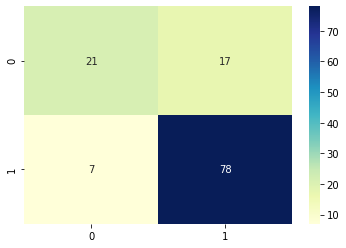

In [59]:
print("Plotting Confusion Matrix on Test Data")
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap='YlGnBu')